#**Introduction**

By: Samantha Belzer

[Dataset](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) ; [Origin of Dataset](https://github.com/fivethirtyeight/data/blob/master/voter-registration/README.md)

Context: I have hypothetically been hired by the government to work for an organization that is interested in information on voter registration in the United States.

The purpose of the project is to analyze data on voter registration in early 2016 and early 2020 within the United States to ultimately determine the relationships between the information. The goal from identifying trends and patterns on both a national and state level in relation to voting registration is to help dictate what course of action may need to be taken to improve voting procedures and increase the number of registered voters across the United States. This notebook is essential in assisting future elections by understanding which regions are primarily taking action within elections and registering to vote and how this can be rectified to ensure unanimous participation to allow for more representation across various groups of people.


Research Questions:

1: How is the maximum and minimum number of registered voters represented among Southern states?


2: How has average voter registration changed nationally from 2016 to 2020?

To start, let's load in the necessary modules and dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

#**Data Processing**

This is what the first five rows of the dataset look like.

In [3]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


There are four variables here. Jurisdiction represents the specific regions in which the data focuses on, which according to the documentation is 11 states and Washington DC. Year represents the election year in which the data from that state was taken, either early 2016 or early 2020. Month represents which month from that election year the data was taken (the documentation says January to May). New registered voters represents the number of people who registered to vote in either early 2016 or early 2020.

Now we will check for any missing data.

In [4]:
voters.isnull().values.any()

False

This prints False meaning there is no missing data so the data has been cleaned already. Therefore, we do not need to drop any missing values.

Let's check the data types.

In [5]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Jurisdiction is an object meaning it's a string. Year is int64 so it's numeric Month is an object so it's a string. New registered voters is int64 so therefore it is numeric.

Now let's rename the Jurisdiction column to "NAME" and rename the New registered voters  column to "registered_voters.

In [6]:
voters = voters.rename(columns ={"Jurisdiction" : "NAME",
                                 "New registered voters" : "registered_voters"})

In [7]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

Since we assigned the new column names to the original dataset "voters" we can see that the changes we made have been successful.

A potential limitation to the data is that the dataset does not provide any information on the demographics of the new registered voters, so we cannot draw conclusions about which specific genders, races, etc. are or are not registering to vote. In addition to a lack of demographics, there is also no information about policies that may have occurred within the 2016 to 2020 timeframe that could have been the reason for voter registration changes. The data also does not specify which political party their registered voters are part of. This could be useful to determine a relationship between voters political party and the party of the candidates from that particular race to see if that had any indication on if more people registered to vote. Also, it would be important to include how many active voters each region has, not just the number of new voters. This would be essentially to include alongside the population of that region to determine how many people are registered to vote in comparison to the number of people who are eligible to uphold their right to vote.

#**Exploratory Data Analysis**

Here we determine when the highest amount of new voter registration occurred.

In [8]:
highest_num = voters.sort_values(by = "registered_voters", ascending = False).iloc[0]  #iloc at index 0 gives us only the first one
print(highest_num)

NAME                 California
Year                       2020
Month                       Feb
registered_voters        238281
Name: 13, dtype: object


The state of California had 238,281 newly registered voters in February of 2020.

Now we will find the average voter registration.

In [9]:
average_reg = voters["registered_voters"].mean()
print(average_reg)

48223.46226415094


The average number of registered voters across the entire dataset is
48,223.46226415094 which comes to about 48,224 registered voters on average. This average takes into account all the values per state for each month in 2016 and 2020 so it is considered the national average for the dataset.

Let's display the instances where the number of newly registered voters was greater than the average voter registration

In [10]:
high_voters = voters[voters["registered_voters"] > average_reg]
high_voters = high_voters.sort_values(by = "registered_voters", ascending = True)
print(len(high_voters))
print(high_voters)

36
              NAME  Year Month  registered_voters
2          Arizona  2016   Mar              48614
42         Florida  2016   Jan              50231
5          Arizona  2020   Feb              50853
1          Arizona  2016   Feb              51155
45         Florida  2016   Apr              52508
60        Illinois  2016   Mar              52782
82  North Carolina  2020   Feb              54053
83  North Carolina  2020   Mar              54807
48         Florida  2020   Mar              54872
55         Georgia  2020   Feb              55386
78  North Carolina  2016   Mar              58272
63        Illinois  2020   Feb              68455
79  North Carolina  2016   Apr              73341
44         Florida  2016   Mar              73627
61        Illinois  2016   Apr              76098
46         Florida  2020   Jan              77466
77  North Carolina  2016   Feb              84357
43         Florida  2016   Feb              87351
8       California  2016   Jan              875

The high_voters dataframe shows that the voter registration number was higher than the average value a total of 36 times. The closest to the average, without being below it, was for Arizona in March of 2016 with 48,614 registered voters. 48,614 is greater than the average of 48,224 which is why it is displayed here.
The values are in ascending order to display the closest value to the mean without being less than or equal to it.

From the dataframe above, let's determine how many times each state went above the national voter registration average.

In [11]:
state_count = high_voters.groupby("NAME")["registered_voters"].count()
print(state_count)

NAME
Arizona           3
California        7
Florida           7
Georgia           1
Illinois          4
North Carolina    6
Texas             8
Name: registered_voters, dtype: int64


Arizona went above the national average for new voter registration 3 times. California went above the national average for new voter registration 7 times. Florida went above the national average for new voter registration 7 times. Georgia went above the national average for new voter registration 1 time. Illinois went above the national average for new voter registration 4 times. North Carolina went above the national average for new voter registration 6 times. Texas went above the national average for new voter registration 8 times. Therefore, Texas went over the national average the most out of all the other states listed.

Next, we will see which three states had the greatest overall new voter registration average.

In [12]:
average_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
average_per_state = average_per_state.sort_values(by = "registered_voters", ascending = False).head(3)
print(average_per_state)

          NAME  registered_voters
1   California         144545.375
10       Texas         114610.100
5      Florida          65868.125


The greatest overall new voter registration average takes the average per state based on the value recorded for each month, January through May, for 2016 and 2020. The three states with the highest overall new voter registration average is in the order of: California, Texas, and Florida. California's average is 144545.375. Texas's average is 114610.100. Lastly, Florida's average is 65868.125.

#**Data Visualization**

Let's plot the total voter registration by state.

In [13]:
total_voters = voters.groupby("NAME")["registered_voters"].sum().reset_index()
total_voters = total_voters.sort_values(by = "registered_voters", ascending = True)
print(total_voters)

                    NAME  registered_voters
3               Delaware              25331
4   District of Columbia              32484
2               Colorado             164220
8               Maryland             221335
11              Virginia             248452
0                Arizona             282492
6                Georgia             292833
7               Illinois             454723
5                Florida             526945
9         North Carolina             560408
10                 Texas            1146101
1             California            1156363


First, as seen above, we must create a new dataframe to get the total number of registered voters per state which will sum the values from each state in 2016 and 2020.

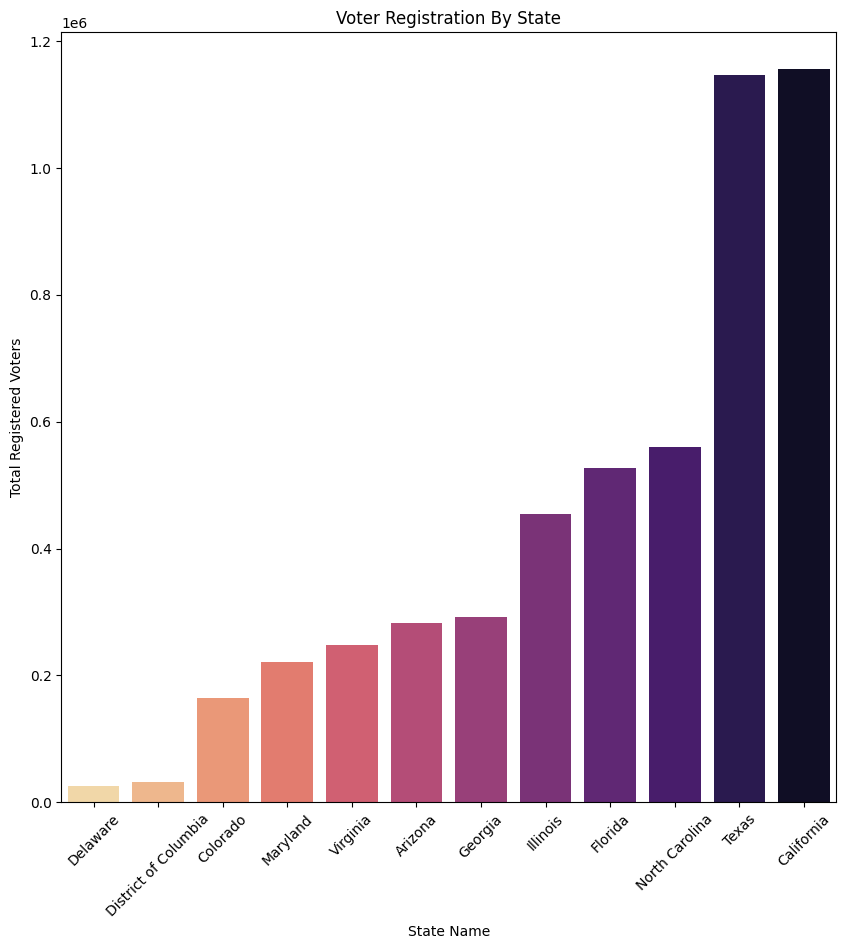

In [14]:
plt.figure(figsize = (10,10))
sns.barplot(total_voters, x="NAME", y="registered_voters", hue = "NAME", palette = "magma_r")
plt.xlabel("State Name")
plt.ylabel("Total Registered Voters")
plt.xticks(rotation = 45)
plt.title("Voter Registration By State")
plt.show()

Some trends that I see is that higher populated states like California and Texas have a greater total number of registered voters because of their greater population. Additionally, Delaware has the smallest number of newly registered voters, even less than DC which is not a state. This shows how Delaware did not have as much representation as other regions did during the 2016 or 2020 election. Another observation is that Texas and California have a similar number of total newly registered voters across 2016 and 2020, as well as Florida with North Carolina and Arizona in comparison to Georgia.

Now we will compare new voter registration in 2016 and 2020 by analyzing the months.

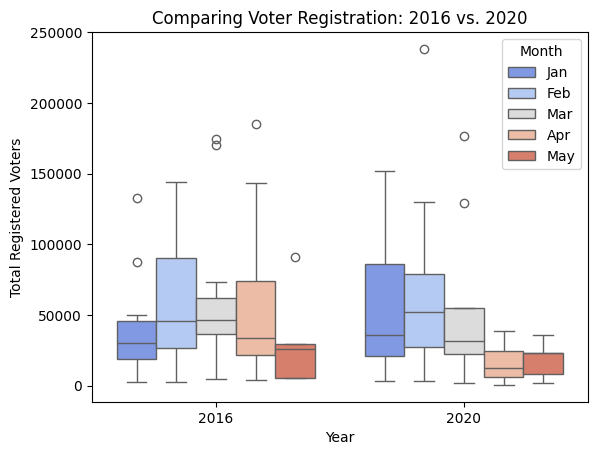

In [15]:
sns.boxplot(voters, x= "Year", y = "registered_voters", hue = "Month", palette = "coolwarm")
plt.xlabel("Year")
plt.ylabel("Total Registered Voters")
plt.title("Comparing Voter Registration: 2016 vs. 2020")
plt.show()

Some trends within the plot is that February appears to be the most popular month for voters to register with the least frequently registered month being in May. January of 2020 appears to have the largest range of data for voters which may be due to the pandemic. The largest median value across 2016 and 2020 appears to be February of 2020. February of 2016 appears to have the greatest values for 50% of the data located within the box. There also appears to be more outliers in 2016 than in 2020.

Based on the first research question, let's see how the maximum and minimum number of registered voters are represented among the Southern states.

In [16]:
southern_states = ["Florida", "North Carolina", "Georgia", "Texas", "Virginia"]
southern_voters = voters[voters["NAME"].isin(southern_states)]
max_south = southern_voters.groupby("NAME")["registered_voters"].max().reset_index()
min_south = southern_voters.groupby("NAME")["registered_voters"].min().reset_index()
max_south["Min or Max"] = "Max"
min_south["Min or Max"] = "Min"
combined = pd.concat([min_south, max_south])

In [17]:
combined.head(10)

,NAME,registered_voters,Min or Max
0,Florida,21031,Min
1,Georgia,15484,Min
2,North Carolina,23517,Min
3,Texas,34694,Min
4,Virginia,5467,Min
0,Florida,109859,Max
1,Georgia,55386,Max
2,North Carolina,111990,Max
3,Texas,170607,Max
4,Virginia,44171,Max


Here we can see that the dataframe called combined includes all 5 of the Southern states within the dataset and their corresponding min and max values.

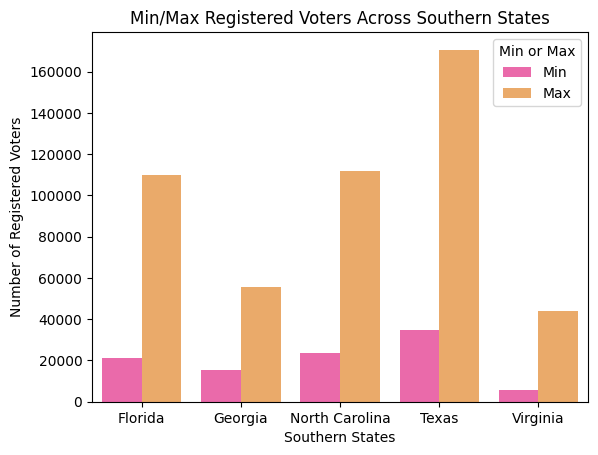

In [18]:
sns.barplot(combined, x= "NAME", y= "registered_voters", hue = "Min or Max", palette = "spring")
plt.xlabel("Southern States")
plt.ylabel("Number of Registered Voters")
plt.title("Min/Max Registered Voters Across Southern States")
plt.legend(title = "Min or Max")
plt.show()

The overall goal here is to compare the min and max values of registered voters across the Southern states to see if there is any correlation with the data for this particular region. Some trends noted within the data is that Virginia has the lowest min and max number of registered voters across all of the Southern states within the dataset. Texas has the largest number of registered voters. However, Texas has a large distinction between the minimum and maximum. Florida and North Carolina have maximum and minimum values that are close to one another. This may suggest that their populations are similar in regards to voter engagement. Majority of the Southern states' minimum values for registered voters is roughly similar. It is when we get to the max number that they differ the most which may be due to population differences.

#**Mapping**

Now we will load in the shape file data to create a map.

In [19]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (13/13), done.


<Axes: >

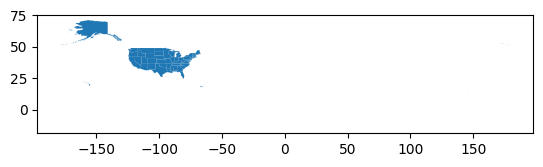

In [20]:
states.plot()

As you can see, this displays the map of the entire United States. However, we want to bound the map strictly to the continental United States.

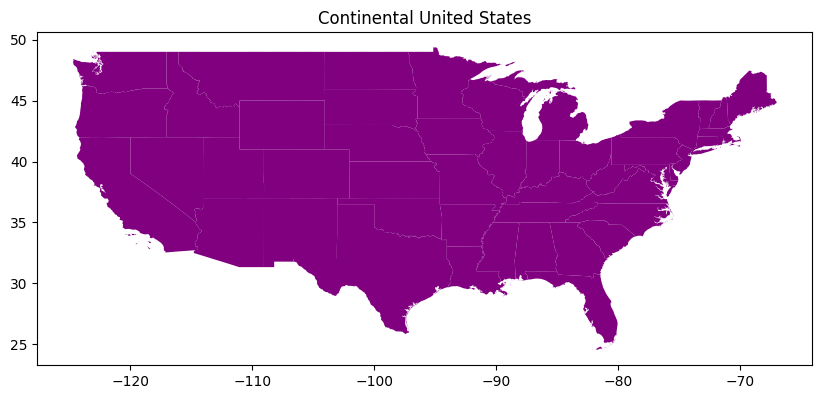

In [21]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10), color = "purple")
plt.title("Continental United States")
plt.show()

This map excludes states that are beyond the continental United States, such as Hawaii and Alaska.

Let's find the average voter registration per state again.

In [22]:
average_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
average_per_state = average_per_state.sort_values(by = "registered_voters", ascending = False)
print(average_per_state)

                    NAME  registered_voters
1             California         144545.375
10                 Texas         114610.100
5                Florida          65868.125
7               Illinois          56840.375
9         North Carolina          56040.800
6                Georgia          36604.125
0                Arizona          35311.500
11              Virginia          24845.200
8               Maryland          22133.500
2               Colorado          20527.500
4   District of Columbia           3248.400
3               Delaware           3166.375


As we can see from the average_per_state dataframe, California has the greatest average voter registration which is 144545.375 and Delaware has the least average voter registration which is 3166.375.

Now we will merge the above dataframe with the shapefile data.

In [23]:
merged = states.merge(average_per_state, on = "NAME", how = "inner")
print(merged)

   STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0       37  01027616  0400000US37    37     NC        North Carolina   00   
1       51  01779803  0400000US51    51     VA              Virginia   00   
2       12  00294478  0400000US12    12     FL               Florida   00   
3       48  01779801  0400000US48    48     TX                 Texas   00   
4       06  01779778  0400000US06    06     CA            California   00   
5       13  01705317  0400000US13    13     GA               Georgia   00   
6       08  01779779  0400000US08    08     CO              Colorado   00   
7       17  01779784  0400000US17    17     IL              Illinois   00   
8       04  01779777  0400000US04    04     AZ               Arizona   00   
9       11  01702382  0400000US11    11     DC  District of Columbia   00   
10      24  01714934  0400000US24    24     MD              Maryland   00   
11      10  01779781  0400000US10    10     DE              Delaware   00   

With merging, we must ensure that the two dataframes have a similar column, which in this case is "NAME." By this method of merging, we only include the data for which the two dataframes both have that state name. Therefore, if both dataframes do not share a state name, it will not be in the merged dataframe.

From our merged dataframe, we will make a map of the continental United States for the states we have information on regarding new voter registration.

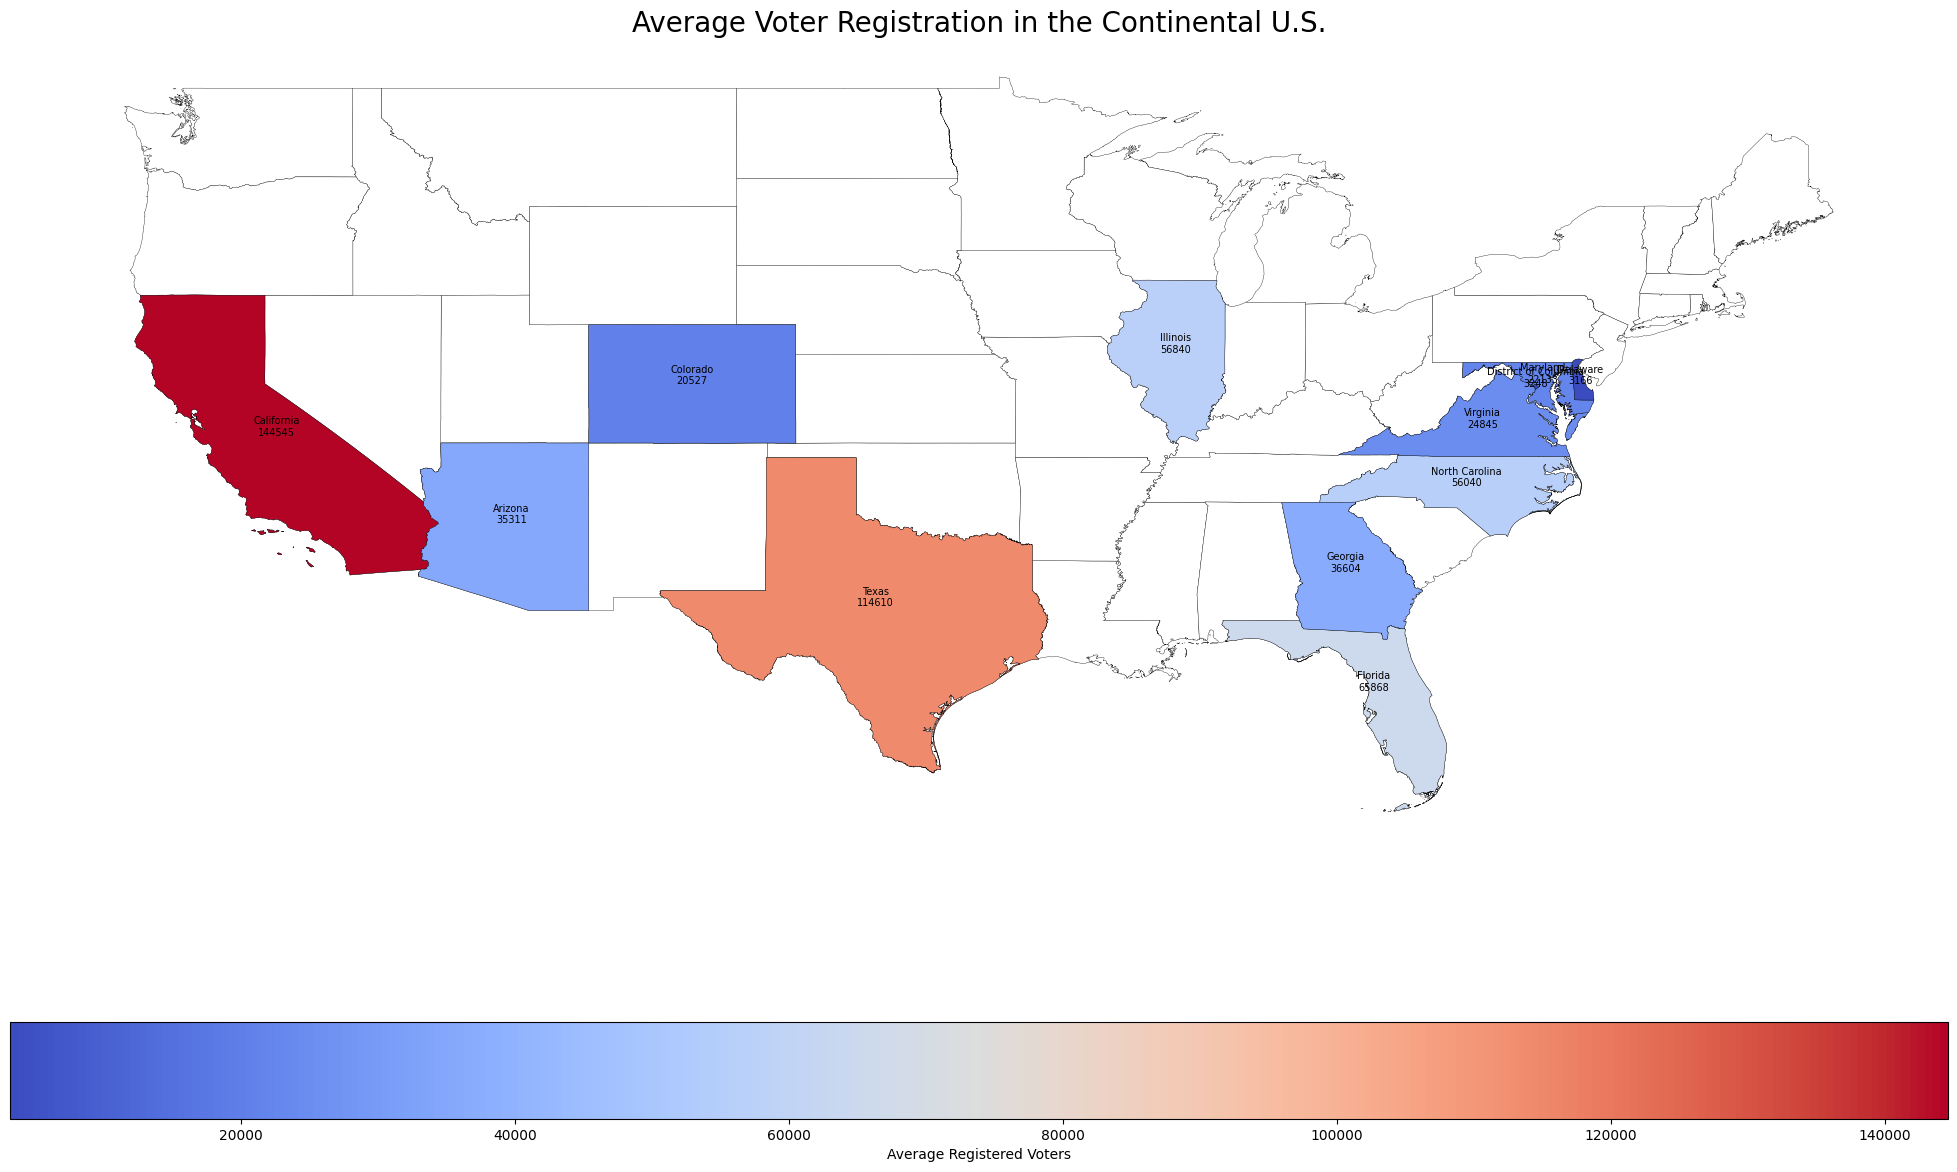

In [25]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
plt.title("Average Voter Registration in the Continental U.S.", fontsize = 20)
bbox.plot(ax=ax, edgecolor = "black", color = "white", linewidth = .25)
merged.plot(column="registered_voters",edgecolor = "black", linewidth = .25,
            ax=ax, legend=True,cmap="coolwarm",
            legend_kwds={"label": "Average Registered Voters", "orientation": "horizontal"})
merged.apply(lambda x: ax.annotate(
    text=x.NAME + "\n" + str(int(x.registered_voters)),
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center",
    fontsize=7), axis=1)
ax.set_axis_off()
plt.show()

This map successfully displays the names of the 12 regions from the dataset and their corresponding average voter registration. The legend also includes a color gradient to visually display which areas have a greater average than others. The other states on the map do not have colors or labels since we do not have any prior information on their average voter registration. As we can see from the map, California has the greatest average voter registration due to its dark red color, and Delaware has the smallest average voter registration due to its dark blue color. Texas appears to be the only other state besides California where the average is in the 100,000's which is why it demonstrates a transition from the blue colors into a more reddish beige color to signify a larger average.

#**Conclusion**

After performing data analysis on the voters dataset, we can conclude that California and Texas have attained the greatest number of registered voters because of their larger population sizes in comparison to the other states listed. Additionally, during the 2020 election it is clear that the COVID-19 pandemic influenced voter registration as the median values for the 2020 data appear to have overall declined in comparison to the 2016 data. However, February 2020 shows an increase in voter engagement due to sudden uprise of the pandemic but in March 2020 it demonstrates voter engagement declining because of quarantine mandates which restricted in-person voting. Furthermore, based on the findings of the minimum and maximum number of registered voters for the Southern states, we can conclude that each Southern state appears to have a great range between these values which ultimately shows disparities of registration within the Southern region.

Some suggestions for my client would be to create more accessible voter registration platforms online that more people, regardless of state, would be inclined to partake in to promote a more equalized representation across different regions of the United States. Also, for Southern states, policymakers should look into methods to ensure that people who are eligible to vote are not being discouraged through state specific systems to ultimately decrease the gap between the range of registered voters. There should also be more ways to educate people on voting to encourage people to exercise their right to vote to boost involvement and representation.

A next step for myself would be to gather data on the demographics, specifically age, to see how much influence age has on newly registered voters. This is valuable information because many younger people, who have recently become eligible to vote, may not be educated on the voting process and how they can make an impact. This is why it is important to mandate events that educate the youth of America on voting procedures because by more young people voting, our data on average registered voters could change greatly and could diminish the vast range between min and max number of voters per state.

#**Academic Integrity**

By writing my name, I certify that:

I did not use resources other than:
the Python notebooks provided by the instructor,
links provided in this notebook,
the assigned readings, and
my own personal notes


This means that I did not:
look up anything on Google, or Stack Overflow, Chatgpt, &c.,
discuss the content of the exam with anyone other than the instructors or TAs, or
do anything that technically doen't break these rules but is against their spirit.

Samantha Belzer